# Assignment II: Exploring Why Civil Resistance Works

### Name:Thomas Saltos

## Setup

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load dataset

In [14]:
dtafile = './Data and Replication Files/WCRWreplication.dta'

df = pd.read_stata(dtafile)
df

,defect,outcome,peakmembership,eyear,byear,location,campaign,target,lccode,tccode,...,lmtnest,ef,loclpolity1,loclcap1,loclcap2,loclcap3,loclcap4,mempc,demdum,recur1
0,1.0,5,50000.0,1959,1956,Cuba,Cuban Revolution,Batista regime,40.0,40.0,...,1.694107,0.213400,-9.0,0.0,1.0,0.0,0.0,1.226839,0.0,0.0
1,0.0,3,5000.0,1920,1918,Haiti,Caco Revolt,U.S. occupation,41.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,1.0,5,30000.0,1985,1985,Haiti,,Jean Claude Duvalier,41.0,41.0,...,2.797281,0.095000,-9.0,1.0,0.0,0.0,0.0,1.200712,0.0,0.0
3,0.0,3,650.0,1924,1916,Dominican Republic,Dominican insurgency,U.S. occupation,42.0,2.0,...,NaN,NaN,NaN,1.0,0.0,0.0,0.0,NaN,0.0,NaN
4,1.0,3,NaN,1965,1965,Dominican Republic,leftists,Loyalist regime,42.0,42.0,...,2.856470,0.386800,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,0.0,3,30000.0,1977,1974,East Timor,Freitilin,Indonesian occupation,850.0,850.0,...,2.442347,0.765784,-7.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0
319,0.0,5,3500.0,2005,1976,Indonesia,GAM,Indonesian occupation,850.0,850.0,...,2.442347,0.765784,-7.0,0.0,0.0,0.0,1.0,0.659205,NaN,0.0
320,1.0,5,6000.0,1999,1988,East Timor,Timorese resistance,Indonesian occupation,850.0,850.0,...,2.442347,0.765784,-7.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0
321,0.0,5,10000.0,1998,1997,Indonesia,,Suharto rule,850.0,850.0,...,2.442347,0.765784,-7.0,0.0,0.0,0.0,1.0,0.750704,0.0,1.0


## 1. Frequency of Nonviolent and Violent Campaign End Years

* `groupby` and pandas `cut` used for groupping in decades. 
* `size` is used to find the frequency of non violent and violent campaigns.
* there is not a number for nonviolent campaign in `[1900, 1910)`, so we add a zero.

In [15]:
bins = np.arange(1900, 2020, 10)
groups = df.groupby(['viol', pd.cut(df.eyear, bins, right=False)], as_index=False)
grouped_df = groups.size().to_frame().reset_index()
grouped_df.rename(columns={0: 'frequency'}, inplace=True)
df_start = pd.DataFrame({'viol': [0],
                         'eyear': [grouped_df.iloc[10].eyear],
                         'frequency': [0]},
                        index=[0])
grouped_df = df_start.append(grouped_df).reset_index()
grouped_df.drop(['index'], axis=1, inplace=True)
grouped_df

,viol,eyear,frequency
0,0,"[1900, 1910)",0
1,0,"[1910, 1920)",1
2,0,"[1920, 1930)",1
3,0,"[1930, 1940)",1
4,0,"[1940, 1950)",5
5,0,"[1950, 1960)",9
6,0,"[1960, 1970)",7
7,0,"[1970, 1980)",7
8,0,"[1980, 1990)",32
9,0,"[1990, 2000)",23


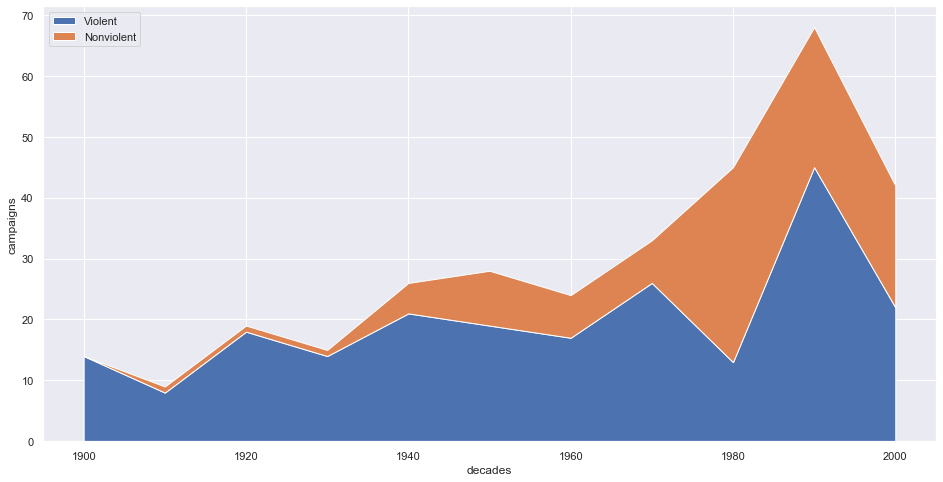

In [16]:
# Plot
plt.figure(figsize=(16, 8))
bins = np.arange(1900, 2010, 10)
violent = grouped_df[grouped_df['viol']==1].frequency.values
nonviolent = grouped_df[grouped_df['viol']==0].frequency.values
plt.stackplot(bins, violent, nonviolent, labels=['Violent', 'Nonviolent'])

plt.legend(loc='upper left')
plt.xlabel('decades')
plt.ylabel('campaigns')
plt.show()

## 2: Number of Nonviolent Campaigns and Percentage of Success

* Remove decades from 1900 to 1940.
* frequency of non violent campaigns.

In [9]:
grouped_df.drop([0,1,2,3,11,12,13,14], inplace=True)
df_non_violent=grouped_df[grouped_df['viol']==0]
df_non_violent

,viol,eyear,frequency
4,0,"[1940, 1950)",5
5,0,"[1950, 1960)",9
6,0,"[1960, 1970)",7
7,0,"[1970, 1980)",7
8,0,"[1980, 1990)",32
9,0,"[1990, 2000)",23
10,0,"[2000, 2010)",20


We compute the frequency of non violent and successful campaigns from 1940 onwards.

In [10]:
bins = np.arange(1940, 2020, 10)
groups = df.groupby(['success', 'viol', pd.cut(df.eyear, bins, right=False)], as_index=False)
outcome_df = groups.size().to_frame().reset_index()
outcome_df.rename(columns={0: 'frequency'}, inplace=True)
non_violent_success = outcome_df[(outcome_df['success']==1) & (outcome_df['viol']==0)]
non_violent_success

,success,viol,eyear,frequency
14,1,0,"[1940, 1950)",2
15,1,0,"[1950, 1960)",3
16,1,0,"[1960, 1970)",3
17,1,0,"[1970, 1980)",4
18,1,0,"[1980, 1990)",17
19,1,0,"[1990, 2000)",12
20,1,0,"[2000, 2010)",14


Success percentage for non violent campaigns.

In [11]:
non_violent_success['success_percentage'] = non_violent_success.frequency/np.array(df_non_violent.frequency)
non_violent_success

c:\users\thomas\envs\notebook\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,success,viol,eyear,frequency,success_percentage
14,1,0,"[1940, 1950)",2,0.400000
15,1,0,"[1950, 1960)",3,0.333333
16,1,0,"[1960, 1970)",3,0.428571
17,1,0,"[1970, 1980)",4,0.571429
18,1,0,"[1980, 1990)",17,0.531250
19,1,0,"[1990, 2000)",12,0.521739
20,1,0,"[2000, 2010)",14,0.700000


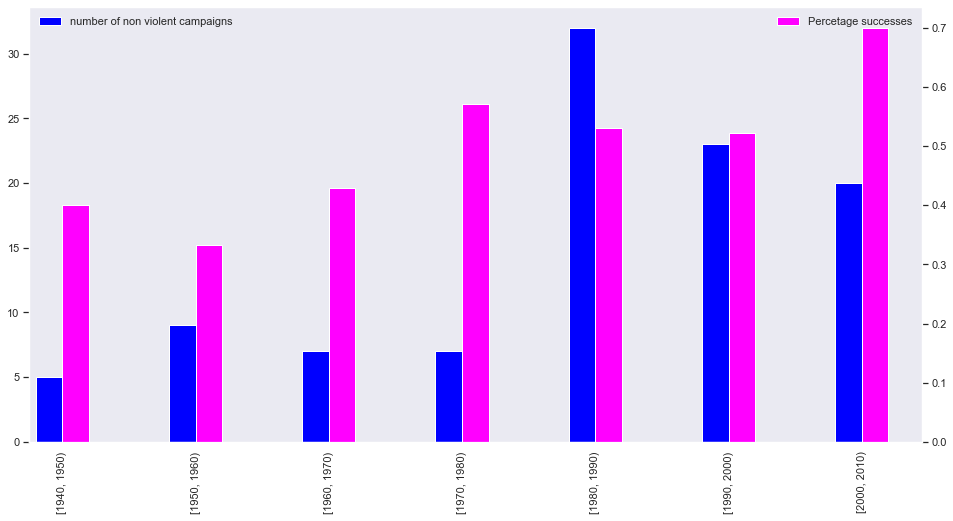

In [12]:
sns.set()

fig = plt.figure(figsize=(16, 8)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.2

df_non_violent.frequency.plot(kind='bar', color='blue', ax=ax, width=width, position=1, label='number of non violent campaigns')
non_violent_success.set_index('eyear').success_percentage.plot(kind='bar', color='magenta', ax=ax2, width=width, position=0, label='Percetage successes')
ax.legend(loc='upper left', frameon=False)
ax2.legend(loc='upper right', frameon=False)
ax.grid(None)
ax2.grid(None)
plt.show()

## 3: Success Rate by decade

In [98]:
grouped_df

,viol,eyear,frequency
4,0,"[1940, 1950)",5
5,0,"[1950, 1960)",9
6,0,"[1960, 1970)",7
7,0,"[1970, 1980)",7
8,0,"[1980, 1990)",32
9,0,"[1990, 2000)",23
10,0,"[2000, 2010)",20
15,1,"[1940, 1950)",21
16,1,"[1950, 1960)",19
17,1,"[1960, 1970)",17


The frequency of violent and successful campaigns from 1940 onwards.

In [99]:
violent_success = outcome_df[(outcome_df['success']==1) & (outcome_df['viol']==1)]
violent_success.drop([28,29,30,31], inplace=True)
violent_success

,success,viol,eyear,frequency
32,1,1,"[1940, 1950)",7
33,1,1,"[1950, 1960)",7
34,1,1,"[1960, 1970)",4
35,1,1,"[1970, 1980)",10
36,1,1,"[1980, 1990)",5
37,1,1,"[1990, 2000)",12
38,1,1,"[2000, 2010)",3


In [100]:
non_violent_success

,success,viol,eyear,frequency,success_percentage
21,1,0,"[1940, 1950)",2,0.400000
22,1,0,"[1950, 1960)",3,0.333333
23,1,0,"[1960, 1970)",3,0.428571
24,1,0,"[1970, 1980)",4,0.571429
25,1,0,"[1980, 1990)",17,0.531250
26,1,0,"[1990, 2000)",12,0.521739
27,1,0,"[2000, 2010)",14,0.700000


Success percentage for violent campaigns.

In [101]:
violent_success['success_percentage'] = violent_success.frequency/np.array(grouped_df[grouped_df['viol']==1].frequency)
violent_success

c:\users\thomas\envs\notebook\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,success,viol,eyear,frequency,success_percentage
32,1,1,"[1940, 1950)",7,0.333333
33,1,1,"[1950, 1960)",7,0.368421
34,1,1,"[1960, 1970)",4,0.235294
35,1,1,"[1970, 1980)",10,0.384615
36,1,1,"[1980, 1990)",5,0.384615
37,1,1,"[1990, 2000)",12,0.266667
38,1,1,"[2000, 2010)",3,0.136364


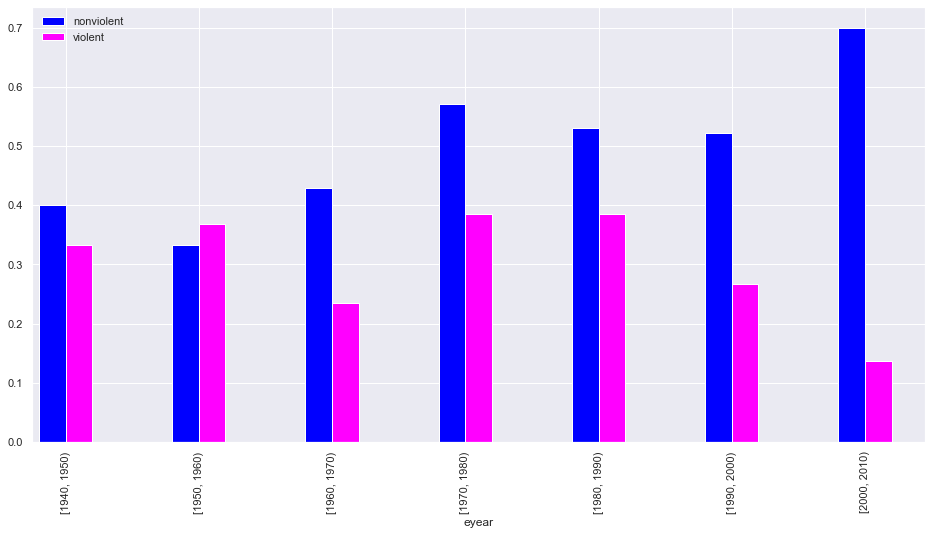

In [103]:
fig = plt.figure(figsize=(16, 8)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
#ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.2

non_violent_success.success_percentage.plot(kind='bar', color='blue', ax=ax, width=width, position=1, label='nonviolent')
violent_success.set_index('eyear').success_percentage.plot(kind='bar', color='magenta', ax=ax, width=width, position=0, label='violent')

ax.legend(loc='upper left', frameon=False)
plt.show()

## 4. Twenty-Five Largest Resistance Campaigns, 1900-2006

`nlargest` is used to find the twenty-five largest resistance campaigns.

In [104]:
df2 = df[['peakmembership', 'eyear', 'byear', 'location', 'target', 'viol', 'success']]
top25 = df2.nlargest(25, 'peakmembership')
top25

,peakmembership,eyear,byear,location,target,viol,success
257,4500000.0,1945,1937,China,Japanese occupation,1,0
206,2000000.0,1979,1977,Iran,Shah Reza Pahlavi,0,1
311,2000000.0,1983,1986,Philippines,Ferdinand Marcos,0,1
10,1000000.0,2006,2006,Mexico,Calderon regime,0,0
38,1000000.0,1985,1984,Brazil,Military rule,0,1
141,1000000.0,1999,1993,Nigeria,Military rule,0,1
228,1000000.0,2005,2005,Lebanon,Syrian forces,0,1
255,1000000.0,1949,1922,China,Kuomintang regime,1,1
262,1000000.0,1968,1967,China,anti-Maoists,1,0
265,1000000.0,1989,1989,China,Communist regime,0,0


In [36]:
top25[top25['location']=='Greece']

,peakmembership,eyear,byear,location,target,viol,success
92,500000.0,1963,1963,Greece,Karamanlis regime,0,1


## 5. The Effect of Participation on the Probability of Campaign Success

In [3]:
from statsmodels.formula.api import logit

success_mod = logit("success ~ mempc + lnpop", df).fit()

success_mod.summary2()

Optimization terminated successfully.
         Current function value: 0.594790
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.129     
Dependent Variable: success          AIC:              199.9014  
Date:               2019-12-01 11:04 BIC:              209.1827  
No. Observations:   163              Log-Likelihood:   -96.951   
Df Model:           2                LL-Null:          -111.35   
Df Residuals:       160              LLR p-value:      5.5508e-07
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -5.8199    1.9207  -3.0301  0.0024  -9.5843  -2.0555
mempc          4.4892    0.9857   4.5545  0.0000   2.5573   6.4210
lnpop          0.0907    0.1285   0.7058  0.4803  -0.1612   0.3426
=================================================================

"""

* one unit increase in mempc brings an increase of 4.4892 in the log odds of having success; equivalently, the odds ratio increases by $e^{4.4892} \approx 89.05$.
* one unit increase in lnpop brings an increase of 0.0907 in the log odds of having success; equivalently, the odds ratio increases by $e^{0.0907} \approx 1.09$ or 9%.
* The intercept is the log odds of having success when all the independent variables are held at zero; that is $e^{-5.8199} \approx 0.0029$. That means that $p / (1-p) = 0.0029$, or $p \approx 0.0028$.

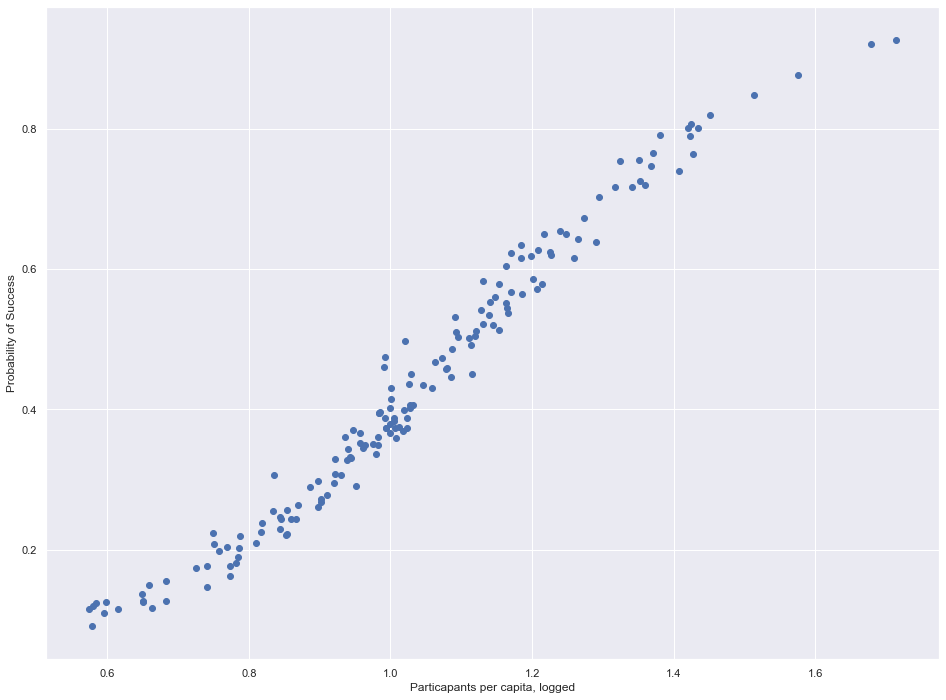

In [17]:
plt.figure(figsize=(16, 12))

predictions = success_mod.predict(df)
plt.scatter(df['mempc'],predictions)
plt.xlabel("Particapants per capita, logged")
plt.ylabel("Probability of Success")
plt.show()

## 6. The Level of Participation Tipping Point

We search for the campaingns that have success probability around 0.5. Let's draw a line at 0.5.

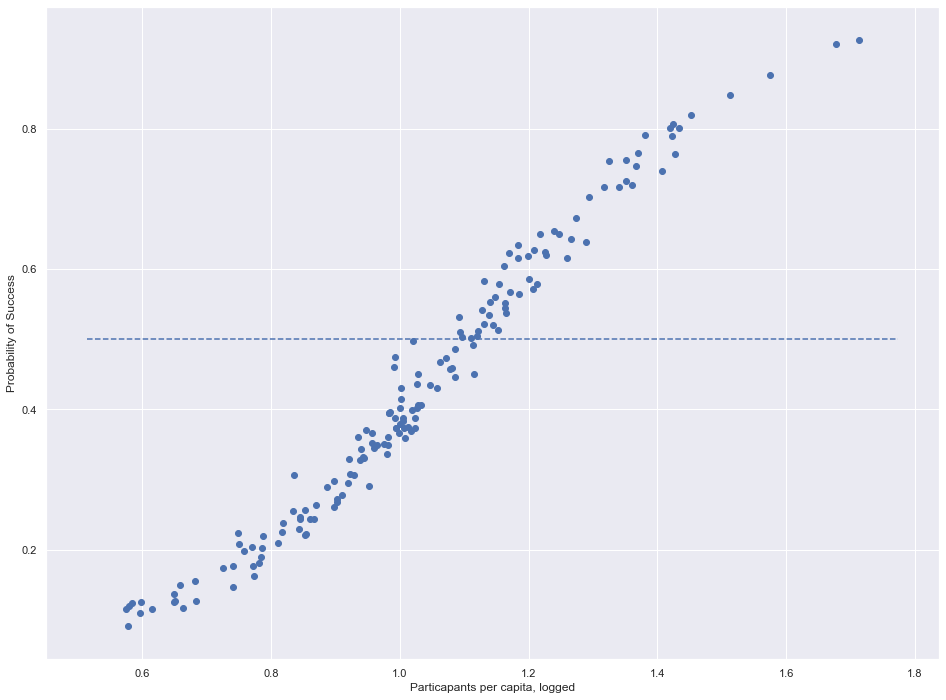

In [18]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
    
plt.figure(figsize=(16, 12))

predictions = success_mod.predict(df)
plt.scatter(df['mempc'],predictions)
abline(0,0.5)
plt.xlabel("Particapants per capita, logged")
plt.ylabel("Probability of Success")
plt.show()

All predictions in descending order.

In [19]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(predictions.sort_values(ascending=False))

110    0.927019
228    0.921259
111    0.877381
112    0.847640
92     0.820082
45     0.807280
75     0.801195
117    0.800837
206    0.791073
232    0.790409
188    0.766306
122    0.764020
189    0.755490
311    0.753807
79     0.747059
167    0.739380
51     0.726186
229    0.720354
88     0.717323
301    0.717117
296    0.703306
124    0.672357
292    0.654665
113    0.650832
114    0.650106
226    0.642693
32     0.638685
141    0.634871
31     0.627783
96     0.624276
38     0.623160
0      0.619573
297    0.619218
186    0.616633
303    0.615826
312    0.604309
2      0.586438
105    0.583003
185    0.579279
131    0.578314
130    0.572444
173    0.567882
249    0.564710
99     0.560119
268    0.553511
154    0.551816
250    0.544386
67     0.541620
22     0.537911
197    0.534021
140    0.532006
223    0.521278
97     0.520845
266    0.513390
72     0.512102
269    0.510537
177    0.504875
299    0.502808
216    0.501905
262    0.497576
248    0.491902
128    0.485526
265    0

`tipping_point` is a dataframe with mempc, lmembers and lnpop in rows with success probability around 0.5.

In [28]:
tipping_point = pd.DataFrame({'mempc': [df.iloc[262].mempc,df.iloc[216].mempc,df.iloc[299].mempc,df.iloc[177].mempc,df.iloc[269].mempc],
                              'lmembers': [df.iloc[262].lmembers,df.iloc[216].lmembers,df.iloc[299].lmembers,df.iloc[177].lmembers,df.iloc[269].lmembers],
                              'lnpop': [df.iloc[262].lnpop,df.iloc[216].lnpop,df.iloc[299].lnpop,df.iloc[177].lnpop,df.iloc[269].lnpop]},
                            index=[0,1,2,3,4])
tipping_point

,mempc,lmembers,lnpop
0,1.020733,13.815511,13.534897
1,1.110516,10.308952,9.283026
2,1.096068,11.002100,10.037786
3,1.119458,10.043249,8.971530
4,1.092927,11.512925,10.534025


* The range of mempc is `[1.02, 1.12]`, mempc = $\frac{lmembers}{lnpop}$
* The percentage is $\frac{e^{ lmembers }}{e^{ lnpop }}$, since the mempc is logged value.
* The percentage of the population that is the tipping point for success in a campaign is the range `[1.32, 2.92]`

## 7. Nonviolent Resistance, Target Regime Type, Geographical Location

#### 1. Examine whether nonviolent resistance remains significant even if we control for the regime type.

In [39]:
log_model = logit("success ~ nonviol + tpolity + lmembers + lnpop", df).fit()

log_model.summary2()

Optimization terminated successfully.
         Current function value: 0.567143
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.163     
Dependent Variable: success          AIC:              169.9344  
Date:               2019-11-30 12:49 BIC:              184.6782  
No. Observations:   141              Log-Likelihood:   -79.967   
Df Model:           4                LL-Null:          -95.506   
Df Residuals:       136              LLR p-value:      2.9528e-06
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.1085    1.4130  -0.0768  0.9388  -2.8779   2.6609
nonviol        0.9048    0.4636   1.9517  0.0510  -0.0038   1.8134
tpolity        0.0520    0.0298   1.7439  0.0812  -0.0064   0.1104
lmembers       0.3751    0.1282   2.9264  0.0034   0.1239   0.6263
lnpop         -0.4363    0.1423  -3.0671  0.0022  -0.7151  -0.1575
=================================================================

"""

* One unit increase in nonviol brings an increase of 0.9048 in the log odds of having success; equivalently, the odds ratio increases by $e^{0.9048} \approx 2.4714$.

* One unit increase in tpolity brings an increase of 0.0520 in the log odds of having success; equivalently, the odds ratio increases by $e^{0.0520} \approx 1.0533$ or about 5%.

* One unit increase in lmembers brings an increase of 0.3751 in the log odds of having success; equivalently, the odds ratio increases by $e^{0.3751} \approx 1.4551$ or about 45%.

* One unit increase in the lnpop brings a decrease of 0.4363 in the log odds of having success; equivalently, as $e^{-0.4363} \approx 0.6464$, the odds of having an success decreases by about 30%.

* The intercept is the log odds of having success when all the independent variables are held at zero; that is $e^{-0.1085} \approx 0.8971$. That means that $p / (1-p) = 0.8971$, or $p \approx 0.47288$.

* We conclude that nonviolent resistance remains significant if we control for the regime type.


#### 2. Examine whether nonviolent resistance remains significant even if we control for geographical location of the compaign.

* location is categorical value.
* in this case, we control logistic regression with georgraphic location (n-1 locations).
* Why n−1? Because if we know the values of the n−1 dummy variable then we also know the value of the missing dummy variable.   So including n distinct values would overspecify the model.

In [47]:
log_model = logit("success ~ nonviol + americas + asia + africa + europe + fsu", df).fit()
log_model.summary2()

Optimization terminated successfully.
         Current function value: 0.591713
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.083     
Dependent Variable: success          AIC:              396.2465  
Date:               2019-11-30 14:46 BIC:              422.6901  
No. Observations:   323              Log-Likelihood:   -191.12   
Df Model:           6                LL-Null:          -208.47   
Df Residuals:       316              LLR p-value:      4.9505e-06
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -1.7374    0.4299  -4.0416  0.0001  -2.5800  -0.8949
nonviol        1.2582    0.2648   4.7515  0.0000   0.7392   1.7771
americas       1.0604    0.5178   2.0479  0.0406   0.0456   2.0753
asia           0.2612    0.5054   0.5168  0.6053  -0.7294   1.2517
africa         1.0235    0.4847   2.1116  0.0347   0.0735   1.9736
europe         0.4650    0.5402   0.8609  0.3893  -0.5936   1.5237
fsu            0.7645    0.6279   1.2176  0.2234  -0.4661   1.9951
=================================================================

"""

* From the model parameters we conclude that nonviolent resistance remains insignificant if we control for geographical location of the compaign.